In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('board2.csv')
df

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


Vis = [“Name”, “Gender”, “Track”, “Math<70”]; hometown is constant as Visayas

In [3]:
Vis = df.loc[(df['Hometown'] == 'Visayas') & (df['Math'] < 70)]
Vis = pd.DataFrame(Vis, columns = ("Name", "Gender", "Track", "Math"))
Vis.to_csv('Vis.csv')
Vis

,Name,Gender,Track,Math
3,S4,Male,Instrumentation,65
10,S11,Female,Communication,48
21,S22,Female,Communication,64


Instru = [“Name”, “GEAS”, “Electronics >70”]; where track is constant as
Instrumentation and hometown Luzon

In [4]:
Instru = df.loc[(df['Hometown'] == 'Luzon') & (df['Track'] == 'Instrumentation') & (df['Electronics'] > 70)]
Instru = pd.DataFrame(Instru, columns = ("Name", "GEAS", "Electronics"))
Instru.to_csv('Instru.csv')
Instru

,Name,GEAS,Electronics
0,S1,75,89
7,S8,64,81
29,S30,57,81


Mindy = [ “Name”, “Track”, “Electronics”, “Average >=55”]; where hometown is
constant as Mindanao and gender Female

In [5]:
mindy = df.copy()
mindy["Average"] = df[["Math", "Electronics", "GEAS", "Communication"]].mean(axis=1)
Mindy = mindy.loc[(mindy['Hometown'] == 'Mindanao') & (mindy['Gender'] == 'Female') & (mindy['Average'] >= 55)]
Mindy = pd.DataFrame(Mindy, columns = ("Name", "Track", "Electronics", "Average"))
Mindy

,Name,Track,Electronics,Average
1,S2,Communication,75,67.25
2,S3,Instrumentation,74,72.75
14,S15,Microelectronics,41,59.00
16,S17,Microelectronics,79,70.50
19,S20,Communication,60,66.50


In [6]:
df["Average"] = df[["Math", "Electronics", "GEAS", "Communication"]].mean(axis=1)
Average = df[["Track", "Gender", "Hometown", "Average"]]
import matplotlib.pyplot as plt

Does chosen track in college contribute to higher average

Text(0.5, 1.0, 'Average by Track')

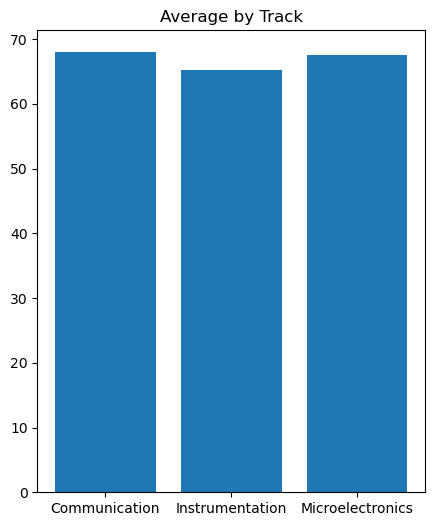

In [7]:
ITrackAve = Average.loc[Average['Track'] == 'Instrumentation', "Average"].mean()
CTrackAve = Average.loc[Average['Track'] == 'Communication', "Average"].mean()
MTrackAve = Average.loc[Average['Track'] == 'Microelectronics', "Average"].mean()
TrackAve = Average.groupby("Track")["Average"].mean().reset_index()
plt.figure(figsize=(5, 6))
plt.bar(TrackAve['Track'], TrackAve['Average'])
plt.title("Average by Track")

Does gender contribute to higher average

Text(0.5, 1.0, 'Average by Gender')

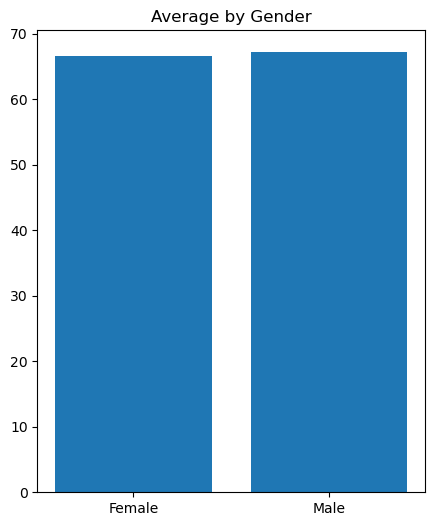

In [8]:
MGenderAve = Average.loc[Average['Gender'] == 'Male', "Average"].mean()
FGenderAve = Average.loc[Average['Gender'] == 'Female', "Average"].mean()
GenderAve = Average.groupby("Gender")["Average"].mean().reset_index()
plt.figure(figsize=(5, 6))
plt.bar(GenderAve['Gender'], GenderAve['Average'])
plt.title("Average by Gender")

Does hometown contribute to higher average

Text(0.5, 1.0, 'Average by Hometown')

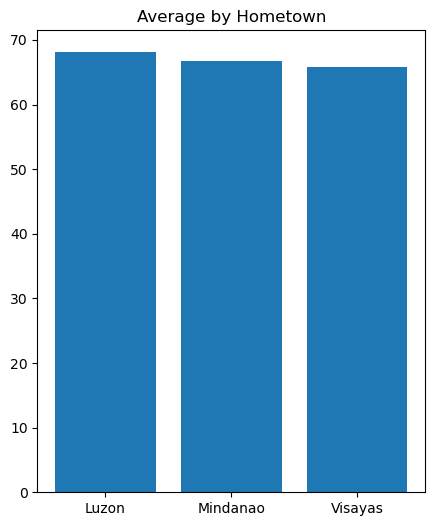

In [9]:
LHomeAve = Average.loc[Average['Hometown'] == 'Luzon', "Average"].mean()
VHomeAve = Average.loc[Average['Hometown'] == 'Visayas', "Average"].mean()
MHomeAve = Average.loc[Average['Hometown'] == 'Mindanao', "Average"].mean()
HomeAve = Average.groupby("Hometown")["Average"].mean().reset_index()
plt.figure(figsize=(5, 6))
plt.bar(HomeAve['Hometown'], HomeAve['Average'])
plt.title("Average by Hometown")